In [ ]:
# Importing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
%load_ext rpy2.ipython

from google.colab import files

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 

In [ ]:
uploaded = files.upload()

Saving EarthquakeData2000-2020.txt to EarthquakeData2000-2020.txt


In [ ]:
# Reading the data file and putting the coordinates into zones
df = pd.read_csv('EarthquakeData2000-2020.txt')

index = df.index
number_of_rows = len(index)

x_cord = [*range(0, 10)]
y_cord = [*range(0, 10)]

cord_matrix = [[None] * 10] * 10

pos = 1
for i in x_cord:
  y_cord = [*range(pos, pos+10)]
  for j in y_cord: 
    cord_matrix[i] = y_cord
    pos += 1

zoneList = []

for i in range(number_of_rows):
    xMatrixPos = int((float(df.iloc[i][1]) - 34.5) / .75)
    yMatrixPos = abs(int((float(df.iloc[i][2]) + 126) / .75))
    zone = cord_matrix[xMatrixPos][yMatrixPos]
    zoneList.append(zone)

df['Zone'] = zoneList
df

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,Zone
0,2000/01/02 15:49:40.65,38.03833,-118.69600,-0.903,3.11,Md,43,107,25,0.06,NCSN,21075275,50
1,2000/01/04 09:17:21.98,40.26567,-124.39133,21.440,3.02,ML,24,221,20,0.07,NCSN,21075687,73
2,2000/01/06 21:38:10.94,38.84400,-122.82567,1.500,3.85,Mw,52,31,5,0.07,NCSN,21076021,55
3,2000/01/07 01:31:19.54,40.65950,-124.66650,21.448,3.20,Md,51,233,35,0.08,NCSN,21076055,82
4,2000/01/07 02:15:53.44,40.43167,-125.17800,4.253,3.02,Md,51,261,71,0.28,NCSN,21076065,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,2019/12/13 23:14:55.76,37.36967,-119.97733,18.360,3.04,ML,68,53,21,0.26,NCSN,73314451,39
3575,2019/12/17 18:29:21.03,35.80583,-120.35600,6.250,4.29,Mw,93,45,3,0.08,NCSN,73315876,18
3576,2019/12/19 15:30:12.98,40.27583,-124.36333,21.400,4.06,Mw,35,231,2,0.07,NCSN,73316566,73
3577,2019/12/24 06:33:59.54,38.81700,-122.76283,2.470,3.16,ML,101,43,2,0.08,NCSN,73318771,55


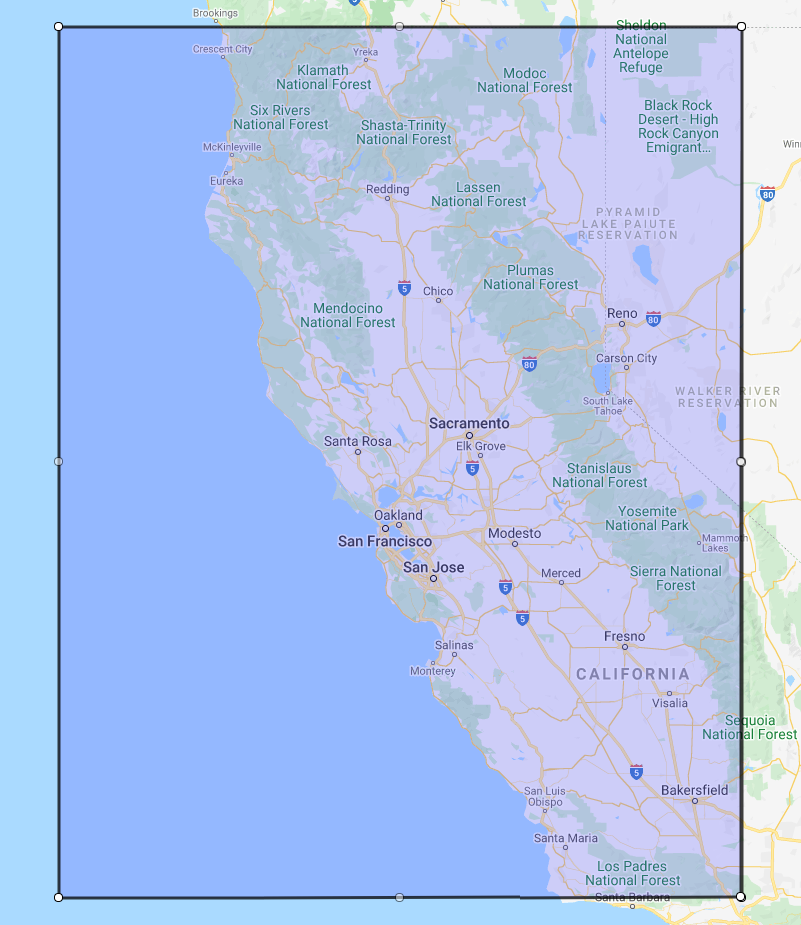


Figure 1. 

This map shows the region in California where the earthquake data comes from. This region is split into zones 0-100 each zone with equal latitudes and longitudes. The earthquake data is from the Northern California Earthquake Data Center.

In [ ]:
# BValue 
# 
# Takes as input a list of prior earhtquakes and the lowest earthquake magnitude of that list
#
# Returns the b-value associated with that list of earthquakes
#
def BValue(priorEventsList, MZero):
  if (len(priorEventsList) == 0): # No earthquakes so just return 0
    return 0 

  lge = math.log(math.e) # log(e)
  n = len(priorEventsList) 

  sumEventMag = 0
  for E in priorEventsList: # sum of prior earthuqakes minus the lowest earthquake magnitude
    sumEventMag += E

  if n == 0 or ((sumEventMag / n) - MZero) == 0:
    return 0

  b = lge / ((sumEventMag / n) - MZero)

  return b

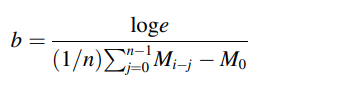

b-value: b corresponds to the Gutenberg-Richter law b-value. It de-facto measures the stress state of that earthquake by comparing the ratio of large to small earthquakes. 

n: number of events considered prior to E(i)

M(i-j): the magnitude of the event E(i-j)

M(0): the cuttoff magnitude of the seismic zone

In [ ]:
# Making a new dataframe with the columns Zone, Mag 3-4 2000, Mag 4-5 2000, Mag 5-6 2000, Mag 6-7 2000, Mag 7-8 2000, Mag 3-4 2001, Mag 4-5 2001, etc
poissonData = []
for zone in range(100 + 1):
  poissonData.append([])
  for year in range(20+1):
    poissonData[zone].append([])
    for month in range(12+1):
      poissonData[zone][year].append({3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0})

poissonDataTotals = []
for zone in range(101):
  poissonDataTotals.append({3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0})

for i in range(101):
  tempData = df[df['Zone'] == i]
  for x in range(len(tempData.index)):
    mag = tempData.iloc[x][4]
    time = tempData.iloc[x][0]
    year = time[0:4]
    month = time[5:7]
    poissonData[i][int(year) - 2000][int(month)][int(mag)] += 1
    poissonDataTotals[i][int(mag)] += 1

In [ ]:
# Calculates the b-value for every earthquake
bValueList = [] # Stores the b-values for each indivisual earthquake with max time interval for each earthquake
bValueZoneList = [] # A list of the total b-values for every zone
priorEventsLists = [] # A list of all prior earthquakes for every zone for every earthquake

# Adds a list for every zone to priorEventsList and the bValueZoneList
for x in range(101):
  priorEventsLists.append([])
  bValueZoneList.append([])

# Calculates the total bVal for every in earhtuake for every zone
for i in range(number_of_rows):
    zone = int(df.iloc[i][12])
    iBval = BValue(priorEventsLists[zone], 3) # Calculates the b-value for that earthquake
    bValueList.append(iBval) # Stores that b-value in the bValueList
    bValueZoneList[zone].append(iBval) 
    mag = (float(df.iloc[i][4]))
    priorEventsLists[zone].append(mag)

df['B-Value'] = bValueList
df

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,Zone,B-Value
0,2000/01/02 15:49:40.65,38.03833,-118.69600,-0.903,3.11,Md,43,107,25,0.06,NCSN,21075275,50,0.000000
1,2000/01/04 09:17:21.98,40.26567,-124.39133,21.440,3.02,ML,24,221,20,0.07,NCSN,21075687,73,0.000000
2,2000/01/06 21:38:10.94,38.84400,-122.82567,1.500,3.85,Mw,52,31,5,0.07,NCSN,21076021,55,0.000000
3,2000/01/07 01:31:19.54,40.65950,-124.66650,21.448,3.20,Md,51,233,35,0.08,NCSN,21076055,82,0.000000
4,2000/01/07 02:15:53.44,40.43167,-125.17800,4.253,3.02,Md,51,261,71,0.28,NCSN,21076065,72,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,2019/12/13 23:14:55.76,37.36967,-119.97733,18.360,3.04,ML,68,53,21,0.26,NCSN,73314451,39,3.906250
3575,2019/12/17 18:29:21.03,35.80583,-120.35600,6.250,4.29,Mw,93,45,3,0.08,NCSN,73315876,18,2.298034
3576,2019/12/19 15:30:12.98,40.27583,-124.36333,21.400,4.06,Mw,35,231,2,0.07,NCSN,73316566,73,2.028740
3577,2019/12/24 06:33:59.54,38.81700,-122.76283,2.470,3.16,ML,101,43,2,0.08,NCSN,73318771,55,2.462018


In [ ]:
# Calculates the average b-value for each zone
avgBVals = []
for bVal in bValueZoneList: 
  if (len(bVal) == 0): # No b-val for that zone
    avgBVals.append(float('NaN'))
    continue
  sum = 0.0 # Sums up the bVals for that zone
  for indvBVal in bVal:
    if (math.isnan(indvBVal) == False):
      sum = sum + indvBVal
  avgBVal = sum / len(bVal)
  avgBVals.append(avgBVal) # Adds it to the list average b-values

In [ ]:
# Calculates the probability there will be at least 3 magnitude 3 earthquakes for each region
atLeast3 = []
for x in range(101):
  atLeast3.append([])

# Calculates the probability there will be at least three magnitude three earthquakes in that zone over a year
for zone in range(101):
  X = poissonDataTotals[zone][3] / (20)
  %Rpush X
  %R Occurrences <- 0:10
  myNum = %R ppois(q = 3, lambda=X, lower.tail = FALSE)
  atLeast3[zone] = myNum[0]

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,Zone,B-Value
0,2000/01/02 15:49:40.65,38.03833,-118.69600,-0.903,3.11,Md,43,107,25,0.06,NCSN,21075275,50,0.000000
1,2000/01/04 09:17:21.98,40.26567,-124.39133,21.440,3.02,ML,24,221,20,0.07,NCSN,21075687,73,0.000000
2,2000/01/06 21:38:10.94,38.84400,-122.82567,1.500,3.85,Mw,52,31,5,0.07,NCSN,21076021,55,0.000000
3,2000/01/07 01:31:19.54,40.65950,-124.66650,21.448,3.20,Md,51,233,35,0.08,NCSN,21076055,82,0.000000
4,2000/01/07 02:15:53.44,40.43167,-125.17800,4.253,3.02,Md,51,261,71,0.28,NCSN,21076065,72,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,2019/12/13 23:14:55.76,37.36967,-119.97733,18.360,3.04,ML,68,53,21,0.26,NCSN,73314451,39,3.906250
3575,2019/12/17 18:29:21.03,35.80583,-120.35600,6.250,4.29,Mw,93,45,3,0.08,NCSN,73315876,18,2.298034
3576,2019/12/19 15:30:12.98,40.27583,-124.36333,21.400,4.06,Mw,35,231,2,0.07,NCSN,73316566,73,2.028740
3577,2019/12/24 06:33:59.54,38.81700,-122.76283,2.470,3.16,ML,101,43,2,0.08,NCSN,73318771,55,2.462018


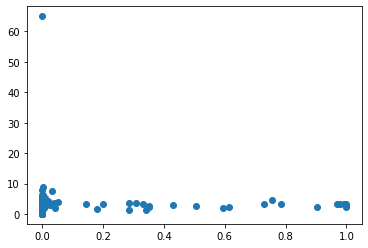

In [ ]:
# Plots a distribution where the x-axis is probability that there will be at least 3 magnitude 3 earthquakes
# for each zone and the y-axis is the average b-value for each zone
xaxis = np.array(atLeast3)
yaxis = np.array(avgBVals)

plt.plot(xaxis, yaxis, 'o')

df

In [ ]:
# Prepares the data for the machine learning models
t = datetime.datetime(year = 2008, month = 5, day = 3, hour = 13, minute = 27, second = 35)
t1 = datetime.datetime(year = 2008, month = 5, day = 3, hour = 13, minute = 27, second = 25)

# setTime
# 
# Takes a string time as input and converts it to a datetime object
#
def setTime(time):
    y = int(time[0:4])
    mo = int(time[5:7])
    d = int(time[8:10])
    h = int(time[11:13])
    mi = int(time[14:16])
    s = int(time[17:19])
    return datetime.datetime(year = y, month = mo, day = d, hour = h, minute = mi, second = s)

bValLastThirty = []
earthquakeNextThirty = []
indvTimes = {}

for i in range(len(df)):
  bValLastThirty.append(0)
  earthquakeNextThirty.append(0)

for i in range(101):
  indvTimes[i] = []

# timeAndRow
#
# initalized with a time string and a row i 
# 
# Stores that information so that the dataframe can store if the previous earthquake in that zone has 
# an earthquake within the next time interval
#
class timeAndRow:
  time = datetime.datetime(year = 2008, month = 5, day = 3, hour = 13, minute = 27, second = 35)
  row = -1

  def __init__(self, time, i):
    self.time = setTime(time)
    self.row = i

# extractRows
# 
# Gets the list of earthquakes that are in a given time interval
#
def extractRows(times):
  timeList = []
  for t in times:
    timeList.append(df.iloc[t.row][4])
  return timeList


timeIntervalList = [1800, 3600, 10800, 14400, 18000, 36000, 72000, 90000]
numEarthquakesInterval = {1800:0, 3600:0, 10800:0, 14400:0, 18000:0, 36000:0, 72000:0, 90000:0}

# setTimeInterval
#
# Calculates the b-value for the last time interval and whether there's an earthquake in the
# next time interval for each earthquake 
#
# Attatches those values to the dataframe
#
def setTimeInterval(timeInterval):
  for i in range(number_of_rows):
    time = df.iloc[i][0]
    indvTime = timeAndRow(time, i)
    zone = int(df.iloc[i][12])
    if (len(indvTimes[zone]) == 0):
      indvTimes[zone].append(indvTime)
      continue
    if ((indvTime.time - indvTimes[zone][-1].time).total_seconds() > timeInterval): # The time of the earhtquake for that zone is outside the time interval
      indvTimes[zone].clear()
    else:
      numEarthquakesInterval[timeInterval] += 1
      earthquakeNextThirty[indvTimes[zone][-1].row] = 1
    bValLastThirty[i] = (BValue(extractRows(indvTimes[zone]) , 3.0))
    indvTimes[zone].append(indvTime)
    df['B-Value Last Interval'] = bValLastThirty
    df['Earthquake in Next Interval?'] = earthquakeNextThirty

tpOVERfpForrest = []
tnOVERfnForrest = []

tpOVERfpLin = []
tnOVERfnLin = []

# Tests each model against all time intervals 
for timeInterval in timeIntervalList: 
  setTimeInterval(timeInterval)

  # Splitting the data into the columns
  cols = [3, 4, 12, 14]
  X = df[df.columns[cols]] # what the model is given
  Y = np.array(df[df.columns[15]]) # what the model is trying to predict

  # Splitting the data so that the first 75% is the training data and the last 25% is the testing data
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 0)

  # Random forrest classifier 
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Logistic Regression
  LR = LogisticRegression()
  LR.fit(X_train, Y_train)

  # Gets the confusion matricies
  cmForrest = confusion_matrix(Y_test, forest.predict(X_test))
  cmLin = confusion_matrix(Y_test, LR.predict(X_test))

  # Extracts values from confusion matricies
  tpForrest = cmForrest[1][1]
  fpForrest = cmForrest[0][1]
  tnForrest = cmForrest[0][0]
  fnForrest = cmForrest[1][0]

  tpLin = cmLin[1][1]
  fpLin = cmLin[0][1]
  tnLin = cmLin[0][0]
  fnLin = cmLin[1][0]

  # Appends the accuracy ratios
  tpOVERfpForrest.append(tpForrest / fpForrest)
  tpOVERfpLin.append(tpLin / fpLin)

  tnOVERfnForrest.append(tnForrest / fnForrest)
  tnOVERfnLin.append(tnLin / fnLin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
tpOVERfpForrestBase = []
tnOVERfnForrestBase = []

tpOVERfpLinBase = []
tnOVERfnLinBase = []

# Tests each model against all time intervals
for timeInterval in timeIntervalList: 
  setTimeInterval(timeInterval)

  # Splitting the data into the columns
  cols = [3, 4, 12]
  X = df[df.columns[cols]] # what the model is given
  Y = np.array(df[df.columns[15]]) # what the model is trying to predict

  # Splitting the data so that the first 75% is the training data and the last 25% is the testing data
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 0)

  # Random forrest classifier 
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Logistic Regression
  LR = LogisticRegression()
  LR.fit(X_train, Y_train)

  # Gets the confusion matricies
  cmForrest = confusion_matrix(Y_test, forest.predict(X_test))
  cmLin = confusion_matrix(Y_test, LR.predict(X_test))

  # Extracts values from confusion matricies
  tpForrest = cmForrest[1][1]
  fpForrest = cmForrest[0][1]
  tnForrest = cmForrest[0][0]
  fnForrest = cmForrest[1][0]

  tpLin = cmLin[1][1]
  fpLin = cmLin[0][1]
  tnLin = cmLin[0][0]
  fnLin = cmLin[1][0]

  # Appends the accuracy ratios
  tpOVERfpForrestBase.append(tpForrest / fpForrest)
  tpOVERfpLinBase.append(tpLin / fpLin)

  tnOVERfnForrestBase.append(tnForrest / fnForrest)
  tnOVERfnLinBase.append(tnLin / fnLin)

In [ ]:
numEarthquakesNextInterval = pd.DataFrame()
numEarthquakesNextInterval['Time Intervals'] = numEarthquakesInterval.keys()
numEarthquakesNextInterval['Number of Earthquakes'] = numEarthquakesInterval.values()



numEarthquakesNextInterval

,Time Intervals,Number of Earthquakes
0,1800,390
1,3600,535
2,10800,673
3,14400,714
4,18000,740
5,36000,843
6,72000,946
7,90000,982


In [ ]:
# Plotting B-val last thirty compared to whethere there's an earthquake in the next thirty minutes
print("With B-Value")

print("Random Forrest")
accuracyTableForrest = pd.DataFrame()
accuracyTableForrest['Time interval in seconds'] = timeIntervalList
accuracyTableForrest['TP / FP'] = tpOVERfpForrest
accuracyTableForrest['TN / FN'] = tnOVERfnForrest
display(accuracyTableForrest)

print("\n \nLogistic Regression")
accuracyTableLin = pd.DataFrame()
accuracyTableLin ['Time interval in seconds'] = timeIntervalList
accuracyTableLin ['TP / FP'] = tpOVERfpLin
accuracyTableLin['TN / FN'] = tnOVERfnLin
display(accuracyTableLin)

With B-Value
Random Forrest


,Time interval in seconds,TP / FP,TN / FN
0,1800,0.958333,14.703704
1,3600,1.133333,9.259259
2,10800,1.838710,7.868132
3,14400,1.431818,7.123711
4,18000,1.420000,7.322581
5,36000,1.588235,5.692982
6,72000,2.078431,5.417391
7,90000,2.055556,5.134454



 
Logistic Regression


,Time interval in seconds,TP / FP,TN / FN
0,1800,NaN,10.623377
1,3600,NaN,6.782609
2,10800,0.000000,5.040541
3,14400,0.000000,4.587500
4,18000,NaN,4.457317
5,36000,0.000000,3.574359
6,72000,1.333333,3.092166
7,90000,1.500000,2.950893


In [ ]:
# Plotting B-val last thirty compared to whethere there's an earthquake in the next thirty minutes
print("Without B-Value")

print("Random Forrest")
accuracyTableForrest = pd.DataFrame()
accuracyTableForrest['Time interval in seconds'] = timeIntervalList
accuracyTableForrest['TP / FP'] = tpOVERfpForrestBase
accuracyTableForrest['TN / FN'] = tnOVERfnForrestBase
display(accuracyTableForrest)

print("\n \nLogistic Regression")
accuracyTableLin = pd.DataFrame()
accuracyTableLin ['Time interval in seconds'] = timeIntervalList
accuracyTableLin ['TP / FP'] = tpOVERfpLinBase
accuracyTableLin['TN / FN'] = tnOVERfnLinBase
display(accuracyTableLin)

Earthquakes greater than magnitude three are so infreuquent that predicting that there won't be an earthquake in the next time interval will be very

Works Cited

https://www.preventionweb.net/files/61119_credeconomiclosses.pdf (Mami Mizutori, Debarati Guha-Sapir) 